In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
MBTI = pd.read_csv('/content/drive/MyDrive/final_proj/dataset/mbti_100_4.csv',encoding='UTF-8')
MBTI.head()

,Unnamed: 0.1,Unnamed: 0,text,mbti,ie,ns,ft,pj
0,0,0,궁금해요 사귄 지 얼마 안 됐고 섬 탈 때도 그냥 용건만 연락하는 편이길래 그러...,infp,i,n,f,p
1,1,1,알려줘야 된다고 생각하세요? 아니면 굳이 필요 없다고 생각하세요? 자잘한 일상 공유...,infp,i,n,f,p
2,2,2,istj와 isfj는 알파벳 한 끗 차이인데 istj이시면서 t와 f가 거의 비슷한...,infp,i,n,f,p
3,3,3,잇디 제분들 직장에서 수다떨기 좋아하시나요? estj 남 entj여 인 분들 연애...,infp,i,n,f,p
4,4,4,뭔가 잘 될 것 같긴 한데 또 길어지는 백수생활 합리화도 하고요...ㅎㅎ ... 지...,infp,i,n,f,p


In [70]:
MBTI = MBTI.iloc[:,2:4]
MBTI.head()

,text,mbti
0,궁금해요 사귄 지 얼마 안 됐고 섬 탈 때도 그냥 용건만 연락하는 편이길래 그러...,infp
1,알려줘야 된다고 생각하세요? 아니면 굳이 필요 없다고 생각하세요? 자잘한 일상 공유...,infp
2,istj와 isfj는 알파벳 한 끗 차이인데 istj이시면서 t와 f가 거의 비슷한...,infp
3,잇디 제분들 직장에서 수다떨기 좋아하시나요? estj 남 entj여 인 분들 연애...,infp
4,뭔가 잘 될 것 같긴 한데 또 길어지는 백수생활 합리화도 하고요...ㅎㅎ ... 지...,infp


In [71]:
MBTI.columns = ['posts','mbti']
MBTI.head()

,posts,mbti
0,궁금해요 사귄 지 얼마 안 됐고 섬 탈 때도 그냥 용건만 연락하는 편이길래 그러...,infp
1,알려줘야 된다고 생각하세요? 아니면 굳이 필요 없다고 생각하세요? 자잘한 일상 공유...,infp
2,istj와 isfj는 알파벳 한 끗 차이인데 istj이시면서 t와 f가 거의 비슷한...,infp
3,잇디 제분들 직장에서 수다떨기 좋아하시나요? estj 남 entj여 인 분들 연애...,infp
4,뭔가 잘 될 것 같긴 한데 또 길어지는 백수생활 합리화도 하고요...ㅎㅎ ... 지...,infp


In [72]:
#Inspection and Cleaning

In [73]:
MBTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24269 entries, 0 to 24268
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   posts   24269 non-null  object
 1   mbti    24269 non-null  object
dtypes: object(2)
memory usage: 379.3+ KB


In [74]:
MBTI = MBTI.rename(columns={'mbti':'Personality Type'})

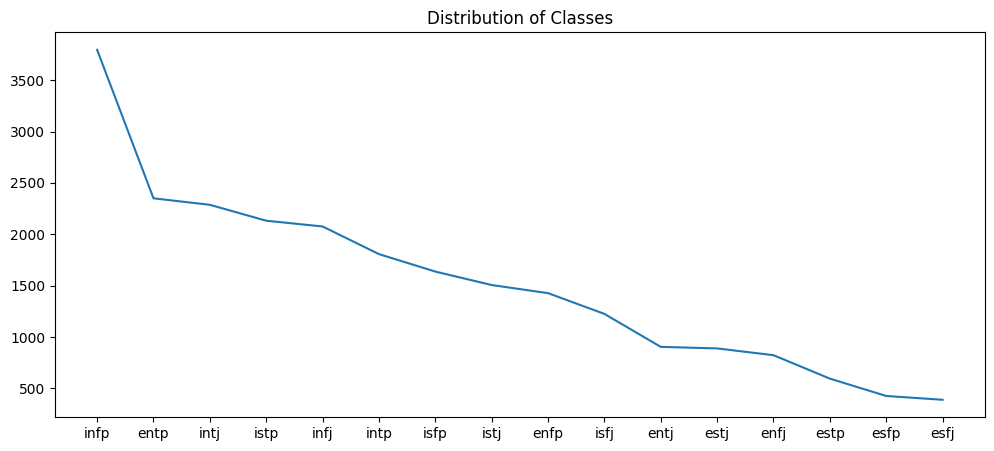

In [75]:
plt.figure(figsize=(12,5))
plt.plot(MBTI['Personality Type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [76]:
#Some amount of class imbalance found.

In [77]:
MBTI['Length'] = MBTI['posts'].apply(lambda x: len(x.split(' ')))
MBTI['Length'].describe()

count    24269.000000
mean        42.142692
std         12.923490
min          1.000000
25%         33.000000
50%         40.000000
75%         48.000000
max        153.000000
Name: Length, dtype: float64

In [78]:
#As we can see the length of the sentences are not exactly 500 each.

In [79]:
#We will now get a list of all the words in all the posts.
#We will take a sample of the data since there are a lot of words present.

In [80]:
MBTI_Pred = MBTI.sample(frac=0.1)
len(MBTI_Pred)

2427

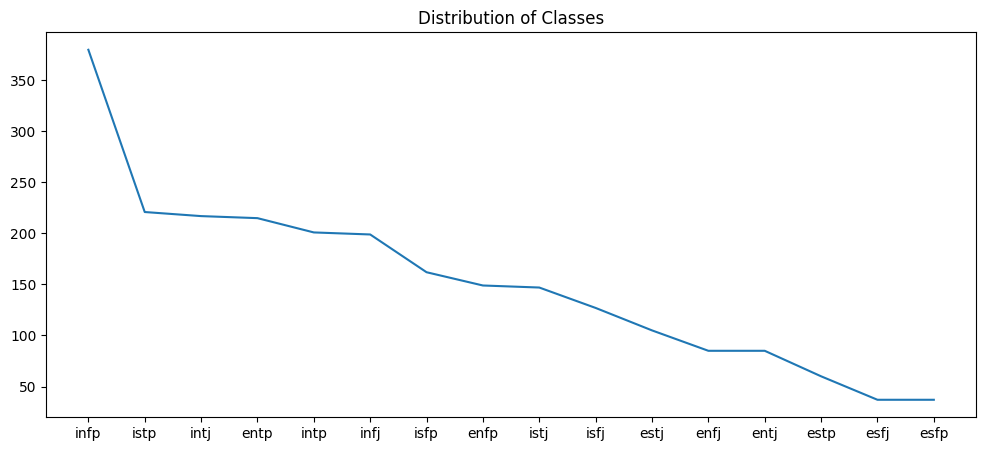

In [81]:
plt.figure(figsize=(12,5))
plt.plot(MBTI_Pred['Personality Type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [83]:
Words = list()
for i in list(MBTI_Pred['posts']):
    for j in i.split(' '):
        Words.append(j)

In [84]:
from collections import Counter

In [85]:
Words_dic = Counter(Words)
Words_dic = pd.DataFrame({'Word':list(Words_dic.keys()),'Frequency':list(Words_dic.values())})
Words_dic.sort_values('Frequency',ascending=False,inplace=True)
Words_dic.set_index('Word',inplace=True)
print(len(Words_dic))
Words_dic.head()

30924


,Frequency
Word,
,14277
안,750
거,741
것,601
잘,543


In [86]:
#Checking distribution of word frequencies

In [87]:
Words_dic['Frequency'].describe()

count    30924.000000
mean         3.272636
std         82.389167
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      14277.000000
Name: Frequency, dtype: float64

In [88]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Words_dic['Frequency'].quantile(i))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
4.0


In [89]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Words_dic['Frequency'].quantile(i))

4.0
4.0
5.0
6.0
7.0
9.0
12.0
17.0
30.0


In [90]:
#Using the top 1 quantile of words based on frequency.

In [91]:
Words_dic = Words_dic[Words_dic.Frequency>30]
len(Words_dic)

306

In [92]:
#We will now apply these words to the entire dataset based on their presence in the posts.

In [93]:
Final_Words = list(Words_dic.index)
for i in Final_Words:
    MBTI[i] = MBTI['posts'].apply(lambda x: 1 if i in x.split(' ') else 0)
MBTI.drop(['Length','posts'],axis=1,inplace=True)
MBTI.head()

,Personality Type,,안,거,것,잘,게,너무,제가,그냥,...,말하는,자신의,마음에,궁금해요,지,생각하고,정도로,스스로,istj,마음을
0,infp,1,1,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,infp,1,0,1,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,infp,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,infp,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,infp,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
len(MBTI)

24269

In [95]:
#EDA

In [96]:
#We will check which top 10 words for each of the different personality types.

In [97]:
MBTI_EDA = MBTI.groupby('Personality Type').mean()
MBTI_EDA = MBTI_EDA.transpose()
MBTI_EDA.head()

Personality Type,enfj,enfp,entj,entp,esfj,esfp,estj,estp,infj,infp,intj,intp,isfj,isfp,istj,istp
,0.902795,0.912404,0.952434,0.937872,0.925450,0.875587,0.925759,0.894118,0.921965,0.931243,0.939222,0.938019,0.946939,0.940134,0.936255,0.924015
안,0.261239,0.243167,0.264381,0.274468,0.236504,0.180751,0.244094,0.268908,0.234586,0.260801,0.235680,0.257333,0.248163,0.257178,0.279548,0.257974
거,0.274605,0.252278,0.254425,0.256170,0.267352,0.223005,0.236220,0.228571,0.238921,0.241043,0.248360,0.263420,0.262857,0.253513,0.235060,0.251407
것,0.170109,0.207428,0.198009,0.200000,0.244216,0.190141,0.220472,0.181513,0.207129,0.202582,0.191955,0.216934,0.203265,0.202199,0.203187,0.194653
잘,0.181045,0.178697,0.196903,0.194043,0.197943,0.227700,0.190101,0.161345,0.208574,0.201791,0.184958,0.198118,0.186939,0.202810,0.196547,0.186210


In [98]:
len(MBTI_EDA)

306

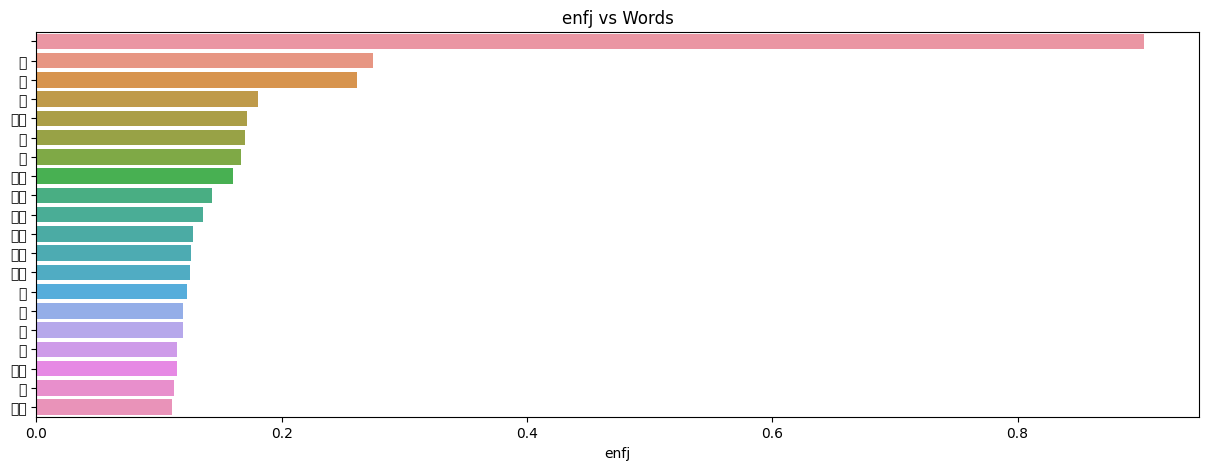

In [100]:
MBTI_EDA_ENFJ = MBTI_EDA[['enfj']]
MBTI_EDA_ENFJ.sort_values('enfj',ascending=False,inplace=True)
MBTI_EDA_ENFJ = MBTI_EDA_ENFJ.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ENFJ.enfj,y=MBTI_EDA_ENFJ.index)
plt.title('enfj vs Words')
plt.show()

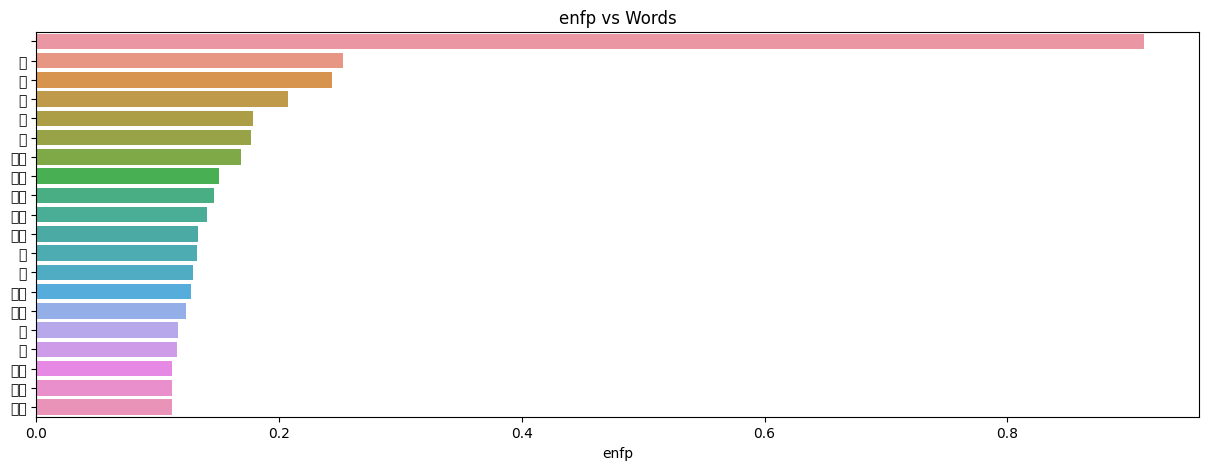

In [101]:
MBTI_EDA_ENFP = MBTI_EDA[['enfp']]
MBTI_EDA_ENFP.sort_values('enfp',ascending=False,inplace=True)
MBTI_EDA_ENFP = MBTI_EDA_ENFP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ENFP.enfp,y=MBTI_EDA_ENFP.index)
plt.title('enfp vs Words')
plt.show()

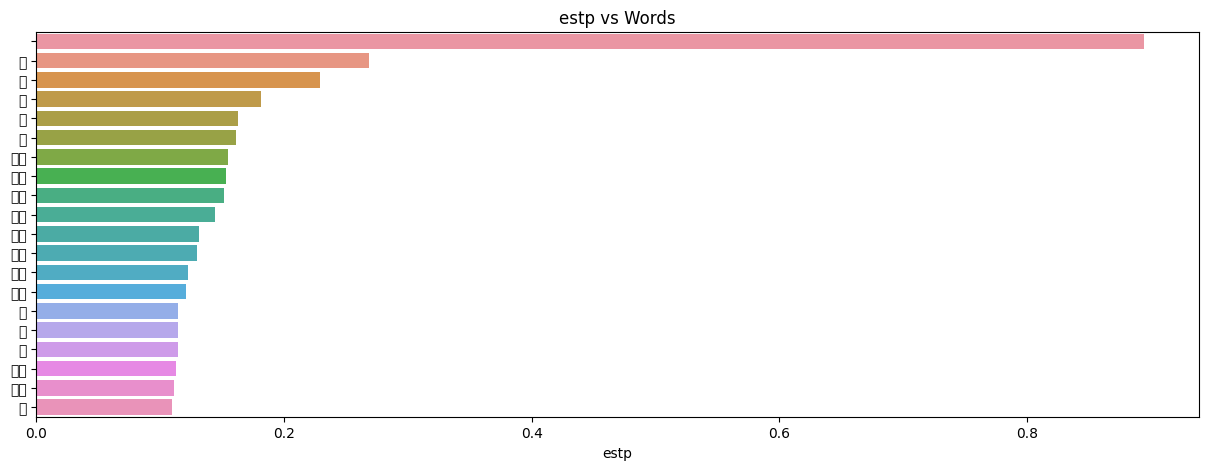

In [102]:
MBTI_EDA_ESTP = MBTI_EDA[['estp']]
MBTI_EDA_ESTP.sort_values('estp',ascending=False,inplace=True)
MBTI_EDA_ESTP = MBTI_EDA_ESTP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ESTP.estp,y=MBTI_EDA_ESTP.index)
plt.title('estp vs Words')
plt.show()

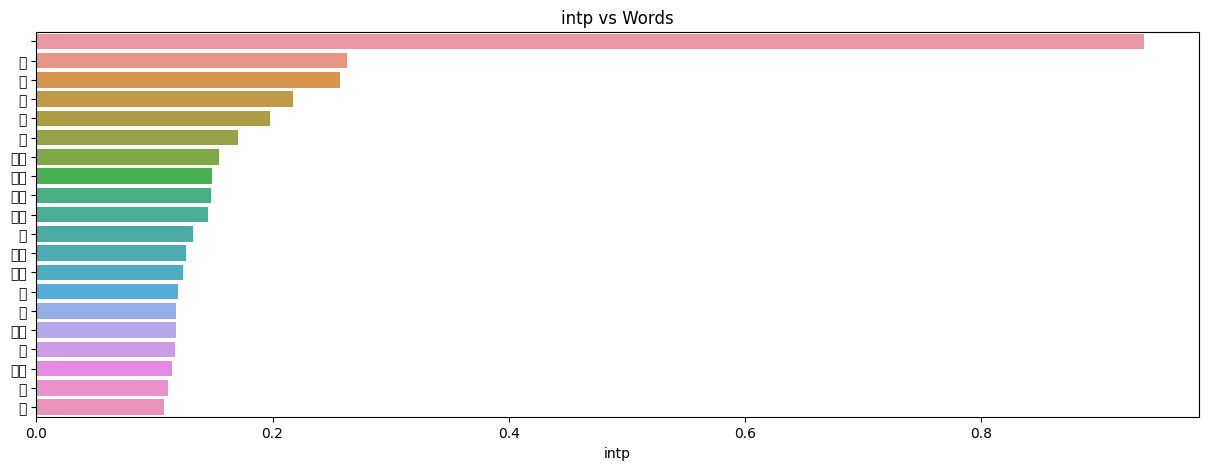

In [103]:
MBTI_EDA_INTP = MBTI_EDA[['intp']]
MBTI_EDA_INTP.sort_values('intp',ascending=False,inplace=True)
MBTI_EDA_INTP = MBTI_EDA_INTP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_INTP.intp,y=MBTI_EDA_INTP.index)
plt.title('intp vs Words')
plt.show()

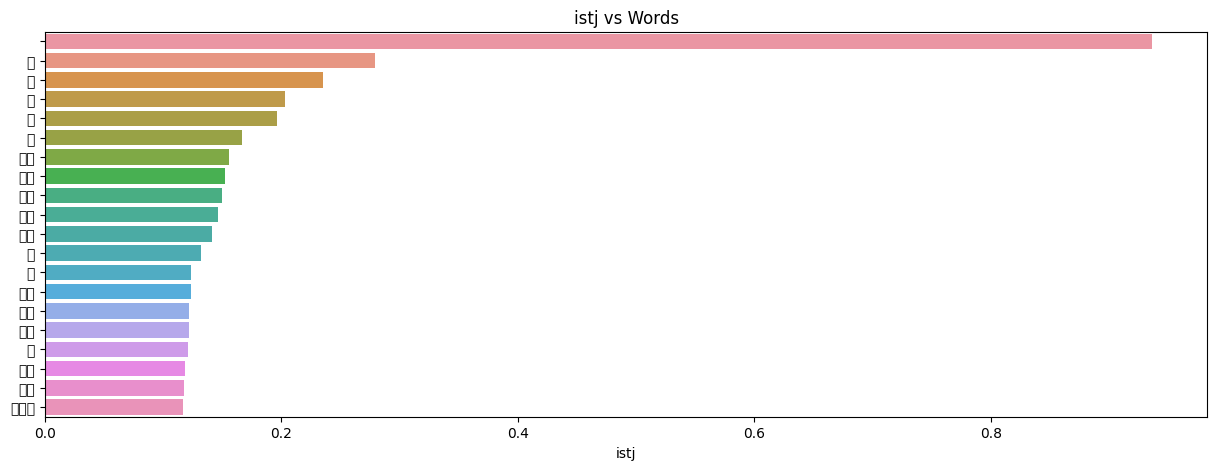

In [104]:
MBTI_EDA_ISTJ = MBTI_EDA[['istj']]
MBTI_EDA_ISTJ.sort_values('istj',ascending=False,inplace=True)
MBTI_EDA_ISTJ = MBTI_EDA_ISTJ.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ISTJ.istj,y=MBTI_EDA_ISTJ.index)
plt.title('istj vs Words')
plt.show()

In [105]:
#We get a chart of the most probable words being used in the posts of some of the personality types.

In [106]:
#Model building

In [107]:
#Now we will build a model to predict each personality type from the words used.

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [109]:
Personalities = ['infp','infj','intp','intj','entp','enfp','istp','isfp','entj','istj','enfj','isfj','estp','esfp','esfj','estj']
Feature_Importance = pd.DataFrame()

In [110]:
#Taking only a small sample of the data for training since we have a lot of data.

In [111]:
MBTI =  MBTI.sample(frac=0.05)

In [112]:
for i in Personalities:
    Temp = MBTI.copy()
    Temp['Personality Type'] = Temp['Personality Type'].apply(lambda x: 1 if x==i else 0)
    X = Temp.drop('Personality Type',axis=1)
    y = Temp['Personality Type']
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

    Model = RandomForestClassifier(n_jobs=-1,random_state=100,class_weight='balanced')

    params = {'n_estimators':[100],
              'max_depth':[3,5,7,10,12,15],
              'max_features':[0.05,0.1,0.15,0.2],
              'criterion':["gini","entropy"]}

    grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
    grid_search.fit(X_train,y_train)

    Model_best = grid_search.best_estimator_

    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)

    print(i)
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))


    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[i] = Model_best.feature_importances_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
infp
Train Accuracy : 0.9623085983510011
Test Accuracy : 0.8653846153846154
Fitting 5 folds for each of 48 candidates, totalling 240 fits
infj
Train Accuracy : 0.9787985865724381
Test Accuracy : 0.9395604395604396
Fitting 5 folds for each of 48 candidates, totalling 240 fits
intp
Train Accuracy : 0.9893992932862191
Test Accuracy : 0.9340659340659341
Fitting 5 folds for each of 48 candidates, totalling 240 fits
intj
Train Accuracy : 0.9882214369846879
Test Accuracy : 0.8818681318681318
Fitting 5 folds for each of 48 candidates, totalling 240 fits
entp
Train Accuracy : 0.9882214369846879
Test Accuracy : 0.8791208791208791
Fitting 5 folds for each of 48 candidates, totalling 240 fits
enfp
Train Accuracy : 0.9764428739693758
Test Accuracy : 0.9340659340659341
Fitting 5 folds for each of 48 candidates, totalling 240 fits
istp
Train Accuracy : 0.9858657243816255
Test Accuracy : 0.8489010989010989
Fitting 5 folds for each of 48 can

In [113]:
Feature_Importance.head()

,Feature,infp,infj,intp,intj,entp,enfp,istp,isfp,entj,istj,enfj,isfj,estp,esfp,esfj,estj
0,,0.005504,0.005713,0.006632,0.007355,0.005872,0.004093,0.005964,0.009609,0.005432,0.012005,0.007915,0.006437,0.012312,0.008757,0.001942,0.006687
1,안,0.008940,0.008888,0.009939,0.009871,0.011920,0.019512,0.012944,0.008581,0.010321,0.030022,0.023006,0.008431,0.016978,0.031260,0.013845,0.016908
2,거,0.006668,0.008225,0.015419,0.011491,0.007746,0.013126,0.008718,0.013373,0.011161,0.008870,0.022285,0.014508,0.017951,0.007191,0.005480,0.018917
3,것,0.010895,0.013303,0.009575,0.011790,0.014952,0.009290,0.009093,0.032962,0.008706,0.013300,0.006996,0.012065,0.019914,0.010375,0.004043,0.011250
4,잘,0.007786,0.006938,0.010085,0.010488,0.007613,0.011984,0.014268,0.009670,0.010147,0.031782,0.031974,0.012394,0.002581,0.008902,0.008654,0.034843


In [114]:
MBTI

,Personality Type,,안,거,것,잘,게,너무,제가,그냥,...,말하는,자신의,마음에,궁금해요,지,생각하고,정도로,스스로,istj,마음을
21255,entj,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10031,isfp,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15636,istj,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17032,enfp,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17296,enfp,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11286,isfp,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9933,isfp,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19814,entp,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23800,istp,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#As we can see most of the models have pretty good accuracy scores on both the test and train sets.

In [ ]:
# END FOR NOW #